In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_data

('2017-08-23',)

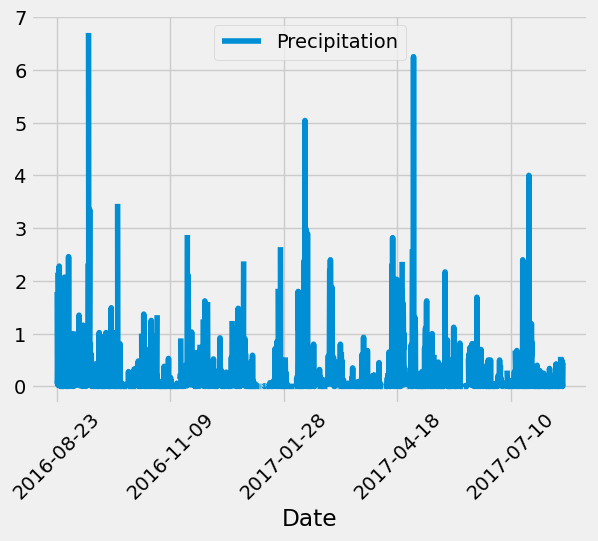

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

lastyr = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= lastyr).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(Precipitation, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
                                             
# Sort the dataframe by date
precipitation_df=pa_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=45)
plt.savefig("Precipitation analysis.png")
plt.show()

Text(0, 0.5, 'Inches')

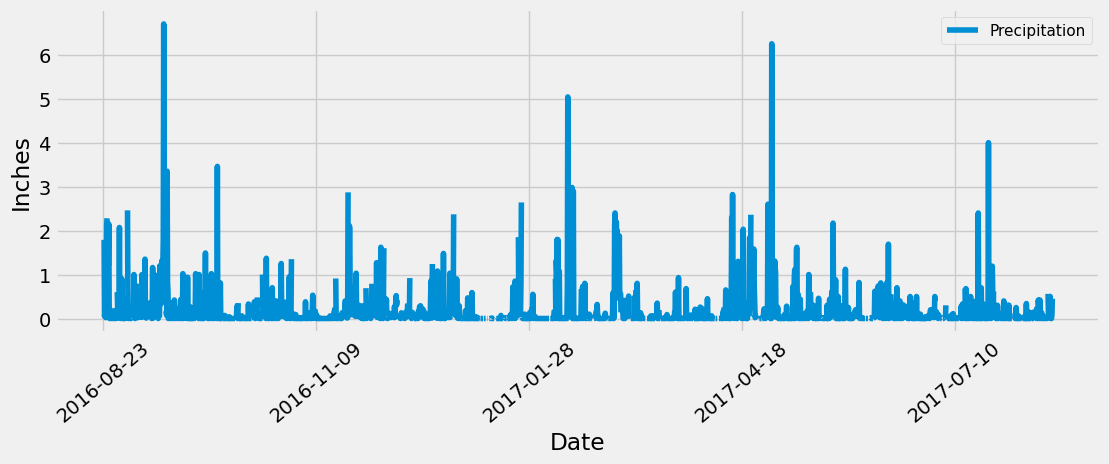

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
y_axis = np.arange(0,max(pa_df['Precipitation']))
ytick_location = [value for value in y_axis]
ax1=pa_df.plot(figsize=(12,4))
ax1.legend(fontsize = 11)
# ax1 = plt.subplots(figsize=(18,5))

plt.yticks(ytick_location)
plt.xticks(rotation=40)
plt.ylabel("Inches")

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(func.distinct(Measurement.station)).count()

session.query(func.count(Measurement.station), Measurement.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc_results=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()

for calc in calc_results:
    print(F"Min: {calc[0]}, Max: {calc[1]}, Average: {calc[2]}")

Min: 54.0, Max: 85.0, Average: 71.66378066378067


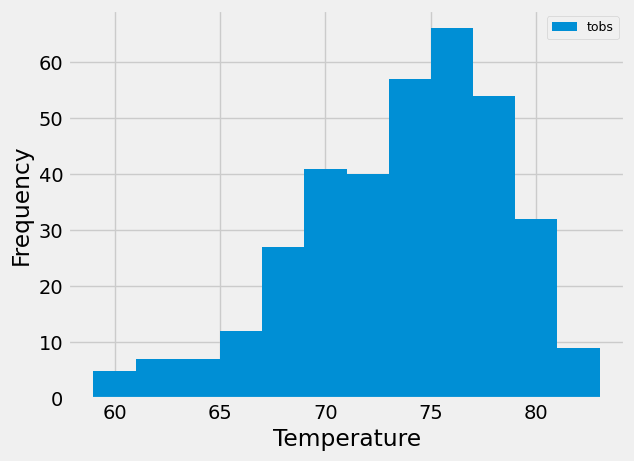

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12=session.query(Measurement.date).\
filter(Measurement.station == "USC00519281").\
order_by(Measurement.date.desc()).first()

prioryr=dt.date(2017,8,18) - dt.timedelta(days=365)

twelvemo = session.query(Measurement.tobs).\
filter(Measurement.station=="USC00519281").\
filter(Measurement.date >= prioryr).all()

usc_df=pd.DataFrame(twelvemo, columns=['tobs'])
ax2 = usc_df.plot.hist(bins=12)
ax2.set_xlabel("Temperature")
ax2.legend(fontsize = 9)
plt.show()

# Close Session

In [26]:
# Close Session
session.close()